# Assignment: Emotional Mining

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline  

In [7]:
import pandas as pd
dataset=pd.read_excel("apple_lap_review.xlsx")  
dataset

,category,review title,review content,rating
0,Apple Laptops,Great!!,Even though it is not brand new my MacBook Air...,4
1,Apple Laptops,Good and bad,Bad:Striped screws on laptop with no hard disk...,3
2,Apple Laptops,Great laptop! You won't be disappointed!,"I wanted to buy a lightweight, yet powerful la...",5
3,Apple Laptops,Used but not abused,Second purchase from Tek. First was an iPad. B...,5
4,Apple Laptops,Recommended. Lightwieght and fast.,I was a Macbook Pro user until I found this li...,5
...,...,...,...,...
578,Apple Laptops,Very happy,Laptop had 2 keys that didn't work but this is...,4
579,Apple Laptops,Great price,Got a good deal on this MacBook Pro,5
580,Apple Laptops,macbook pro 2016,good device,5
581,Apple Laptops,Looks great,"Arrived fast and on time and looks brand new, ...",5


In [8]:
df=dataset.drop("category",axis=1)

In [10]:
df=df.drop("review title",axis=1)

In [12]:
df=df.drop("rating",axis=1)

In [17]:
df.rename(columns = {'review content':'review'}, inplace = True)

In [18]:
df

,review
0,Even though it is not brand new my MacBook Air...
1,Bad:Striped screws on laptop with no hard disk...
2,"I wanted to buy a lightweight, yet powerful la..."
3,Second purchase from Tek. First was an iPad. B...
4,I was a Macbook Pro user until I found this li...
...,...
578,Laptop had 2 keys that didn't work but this is...
579,Got a good deal on this MacBook Pro
580,good device
581,"Arrived fast and on time and looks brand new, ..."


In [19]:
for i in df.review:
  print(i.strip())

Even though it is not brand new my MacBook Air was in great condition, looks almost new. it is a mid 2011 model  but Iâ€™m totally satisfied with my purchase. Packing was secure and there are no visible dents to the body no real signs of wear and tear especially for the year. Love it!!!!Read full review...
Bad:Striped screws on laptop with no hard disk is a total nightmare. Had to use all sorts of methods and eventually stab a knife to get the screws off. Good:Apart from the striped screws, which may be a major issue if you do not succeed in getting the bottom plate off, the machine is in decent shape no battery issues or otherwise.Very minimal cosmetic wear and tear.Read full review...
I wanted to buy a lightweight, yet powerful laptop for college and was considering buying a Windows 8 machine until I found this laptop on eBay. It is the absolute perfect weight and has that sophisticated style that any college student can appreciate. The i5 processor completes any task given to it wit

In [24]:
df = [x.strip() for x in df.review] # remove both the leading and the trailing characters


In [25]:
df

['Even though it is not brand new my MacBook Air was in great condition, looks almost new. it is a mid 2011 model  but Iâ€™m totally satisfied with my purchase. Packing was secure and there are no visible dents to the body no real signs of wear and tear especially for the year. Love it!!!!Read full review...',
 'Bad:Striped screws on laptop with no hard disk is a total nightmare. Had to use all sorts of methods and eventually stab a knife to get the screws off. Good:Apart from the striped screws, which may be a major issue if you do not succeed in getting the bottom plate off, the machine is in decent shape no battery issues or otherwise.Very minimal cosmetic wear and tear.Read full review...',
 "I wanted to buy a lightweight, yet powerful laptop for college and was considering buying a Windows 8 machine until I found this laptop on eBay. It is the absolute perfect weight and has that sophisticated style that any college student can appreciate. The i5 processor completes any task given

In [26]:
df = [x for x in df if x] # removes empty strings, because they are considered in Python as False
df[0:10]   

['Even though it is not brand new my MacBook Air was in great condition, looks almost new. it is a mid 2011 model  but Iâ€™m totally satisfied with my purchase. Packing was secure and there are no visible dents to the body no real signs of wear and tear especially for the year. Love it!!!!Read full review...',
 'Bad:Striped screws on laptop with no hard disk is a total nightmare. Had to use all sorts of methods and eventually stab a knife to get the screws off. Good:Apart from the striped screws, which may be a major issue if you do not succeed in getting the bottom plate off, the machine is in decent shape no battery issues or otherwise.Very minimal cosmetic wear and tear.Read full review...',
 "I wanted to buy a lightweight, yet powerful laptop for college and was considering buying a Windows 8 machine until I found this laptop on eBay. It is the absolute perfect weight and has that sophisticated style that any college student can appreciate. The i5 processor completes any task given

In [27]:
# Joining the list into one string/text
text = ' '.join(df)
print(text) 

Even though it is not brand new my MacBook Air was in great condition, looks almost new. it is a mid 2011 model  but Iâ€™m totally satisfied with my purchase. Packing was secure and there are no visible dents to the body no real signs of wear and tear especially for the year. Love it!!!!Read full review... Bad:Striped screws on laptop with no hard disk is a total nightmare. Had to use all sorts of methods and eventually stab a knife to get the screws off. Good:Apart from the striped screws, which may be a major issue if you do not succeed in getting the bottom plate off, the machine is in decent shape no battery issues or otherwise.Very minimal cosmetic wear and tear.Read full review... I wanted to buy a lightweight, yet powerful laptop for college and was considering buying a Windows 8 machine until I found this laptop on eBay. It is the absolute perfect weight and has that sophisticated style that any college student can appreciate. The i5 processor completes any task given to it wit

In [28]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [29]:
#Punctuation
no_punc_text = text.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text

'Even though it is not brand new my MacBook Air was in great condition looks almost new it is a mid 2011 model  but Iâ€™m totally satisfied with my purchase Packing was secure and there are no visible dents to the body no real signs of wear and tear especially for the year Love itRead full review BadStriped screws on laptop with no hard disk is a total nightmare Had to use all sorts of methods and eventually stab a knife to get the screws off GoodApart from the striped screws which may be a major issue if you do not succeed in getting the bottom plate off the machine is in decent shape no battery issues or otherwiseVery minimal cosmetic wear and tearRead full review I wanted to buy a lightweight yet powerful laptop for college and was considering buying a Windows 8 machine until I found this laptop on eBay It is the absolute perfect weight and has that sophisticated style that any college student can appreciate The i5 processor completes any task given to it with ease I enjoy mostly ev

In [30]:
import nltk

In [31]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ankit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [32]:
#Tokenization: Natuaral Langauage Toolkit
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens) 

['Even', 'though', 'it', 'is', 'not', 'brand', 'new', 'my', 'MacBook', 'Air', 'was', 'in', 'great', 'condition', 'looks', 'almost', 'new', 'it', 'is', 'a', 'mid', '2011', 'model', 'but', 'Iâ€™m', 'totally', 'satisfied', 'with', 'my', 'purchase', 'Packing', 'was', 'secure', 'and', 'there', 'are', 'no', 'visible', 'dents', 'to', 'the', 'body', 'no', 'real', 'signs', 'of', 'wear', 'and', 'tear', 'especially', 'for', 'the', 'year', 'Love', 'itRead', 'full', 'review', 'BadStriped', 'screws', 'on', 'laptop', 'with', 'no', 'hard', 'disk', 'is', 'a', 'total', 'nightmare', 'Had', 'to', 'use', 'all', 'sorts', 'of', 'methods', 'and', 'eventually', 'stab', 'a', 'knife', 'to', 'get', 'the', 'screws', 'off', 'GoodApart', 'from', 'the', 'striped', 'screws', 'which', 'may', 'be', 'a', 'major', 'issue', 'if', 'you', 'do', 'not', 'succeed', 'in', 'getting', 'the', 'bottom', 'plate', 'off', 'the', 'machine', 'is', 'in', 'decent', 'shape', 'no', 'battery', 'issues', 'or', 'otherwiseVery', 'minimal', 'cosm

In [33]:
len(text_tokens) 

19191

In [34]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ankit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ankit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
my_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [36]:
len(my_stop_words)

180

In [37]:
text_tokens

['Even',
 'though',
 'it',
 'is',
 'not',
 'brand',
 'new',
 'my',
 'MacBook',
 'Air',
 'was',
 'in',
 'great',
 'condition',
 'looks',
 'almost',
 'new',
 'it',
 'is',
 'a',
 'mid',
 '2011',
 'model',
 'but',
 'Iâ€™m',
 'totally',
 'satisfied',
 'with',
 'my',
 'purchase',
 'Packing',
 'was',
 'secure',
 'and',
 'there',
 'are',
 'no',
 'visible',
 'dents',
 'to',
 'the',
 'body',
 'no',
 'real',
 'signs',
 'of',
 'wear',
 'and',
 'tear',
 'especially',
 'for',
 'the',
 'year',
 'Love',
 'itRead',
 'full',
 'review',
 'BadStriped',
 'screws',
 'on',
 'laptop',
 'with',
 'no',
 'hard',
 'disk',
 'is',
 'a',
 'total',
 'nightmare',
 'Had',
 'to',
 'use',
 'all',
 'sorts',
 'of',
 'methods',
 'and',
 'eventually',
 'stab',
 'a',
 'knife',
 'to',
 'get',
 'the',
 'screws',
 'off',
 'GoodApart',
 'from',
 'the',
 'striped',
 'screws',
 'which',
 'may',
 'be',
 'a',
 'major',
 'issue',
 'if',
 'you',
 'do',
 'not',
 'succeed',
 'in',
 'getting',
 'the',
 'bottom',
 'plate',
 'off',
 'the',


In [38]:
#Removing the stop words
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40]) 

['Even', 'though', 'brand', 'new', 'MacBook', 'Air', 'great', 'condition', 'looks', 'almost', 'new', 'mid', '2011', 'model', 'Iâ€™m', 'totally', 'satisfied', 'purchase', 'Packing', 'secure', 'visible', 'dents', 'body', 'real', 'signs', 'wear', 'tear', 'especially', 'year', 'Love', 'itRead', 'full', 'review', 'BadStriped', 'screws', 'laptop', 'hard', 'disk', 'total', 'nightmare']


In [39]:
len(no_stop_tokens)

11821

In [40]:
#list comprehension
m = []
for i in range(1,11):
    m.append(i**2)

In [41]:
m

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]

In [42]:
[i**2 for i in range(1,11)]

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]

In [43]:
#Syntax: [var for var in seq]

In [44]:
for i in no_stop_tokens:
    print(i.lower())

even
though
brand
new
macbook
air
great
condition
looks
almost
new
mid
2011
model
iâ€™m
totally
satisfied
purchase
packing
secure
visible
dents
body
real
signs
wear
tear
especially
year
love
itread
full
review
badstriped
screws
laptop
hard
disk
total
nightmare
had
use
sorts
methods
eventually
stab
knife
get
screws
goodapart
striped
screws
may
major
issue
succeed
getting
bottom
plate
machine
decent
shape
battery
issues
otherwisevery
minimal
cosmetic
wear
tearread
full
review
i
wanted
buy
lightweight
yet
powerful
laptop
college
considering
buying
windows
8
machine
i
found
laptop
ebay
it
absolute
perfect
weight
sophisticated
style
college
student
appreciate
the
i5
processor
completes
task
given
ease
i
enjoy
mostly
everything
laptop
minor
exceptions
battery
life
lack
higher
resolution
display
at
rated
7
hours
nothing
sneeze
watching
videos
extensive
use
shorten
overall
time
i
know
latest
generation
intel
chips
solved
problem
fault
machine
the
screen
bright
vivid
although
recent
full
hd
4k


In [45]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:25]) 

['even', 'though', 'brand', 'new', 'macbook', 'air', 'great', 'condition', 'looks', 'almost', 'new', 'mid', '2011', 'model', 'iâ€™m', 'totally', 'satisfied', 'purchase', 'packing', 'secure', 'visible', 'dents', 'body', 'real', 'signs']


In [46]:
len(lower_words)

11821

In [47]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40]) 

['even', 'though', 'brand', 'new', 'macbook', 'air', 'great', 'condit', 'look', 'almost', 'new', 'mid', '2011', 'model', 'iâ€™m', 'total', 'satisfi', 'purchas', 'pack', 'secur', 'visibl', 'dent', 'bodi', 'real', 'sign', 'wear', 'tear', 'especi', 'year', 'love', 'itread', 'full', 'review', 'badstrip', 'screw', 'laptop', 'hard', 'disk', 'total', 'nightmar']


In [48]:
#!python -m spacy download en
#!python -m spacy download en_core_web_lg

In [49]:
# NLP english language model of spacy library
nlp = spacy.load('en_core_web_sm') 

In [50]:
nlp

In [51]:
no_stop_tokens

['Even',
 'though',
 'brand',
 'new',
 'MacBook',
 'Air',
 'great',
 'condition',
 'looks',
 'almost',
 'new',
 'mid',
 '2011',
 'model',
 'Iâ€™m',
 'totally',
 'satisfied',
 'purchase',
 'Packing',
 'secure',
 'visible',
 'dents',
 'body',
 'real',
 'signs',
 'wear',
 'tear',
 'especially',
 'year',
 'Love',
 'itRead',
 'full',
 'review',
 'BadStriped',
 'screws',
 'laptop',
 'hard',
 'disk',
 'total',
 'nightmare',
 'Had',
 'use',
 'sorts',
 'methods',
 'eventually',
 'stab',
 'knife',
 'get',
 'screws',
 'GoodApart',
 'striped',
 'screws',
 'may',
 'major',
 'issue',
 'succeed',
 'getting',
 'bottom',
 'plate',
 'machine',
 'decent',
 'shape',
 'battery',
 'issues',
 'otherwiseVery',
 'minimal',
 'cosmetic',
 'wear',
 'tearRead',
 'full',
 'review',
 'I',
 'wanted',
 'buy',
 'lightweight',
 'yet',
 'powerful',
 'laptop',
 'college',
 'considering',
 'buying',
 'Windows',
 '8',
 'machine',
 'I',
 'found',
 'laptop',
 'eBay',
 'It',
 'absolute',
 'perfect',
 'weight',
 'sophisticated'

In [52]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40]) 

Even though brand new MacBook Air great condition looks almost new mid 2011 model Iâ€™m totally satisfied purchase Packing secure visible dents body real signs wear tear especially year Love itRead full review BadStriped screws laptop hard disk


In [53]:
len(doc)

12224

In [54]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['even', 'though', 'brand', 'new', 'MacBook', 'Air', 'great', 'condition', 'look', 'almost', 'new', 'mid', '2011', 'model', 'Iâ€', '™', 'm', 'totally', 'satisfied', 'purchase', 'packing', 'secure', 'visible', 'dent', 'body']


In [55]:
len(lemmas)

12224

#### Feature Extraction

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas) 

In [57]:
print(vectorizer.vocabulary_)

{'even': 751, 'though': 2090, 'brand': 343, 'new': 1391, 'macbook': 1245, 'air': 167, 'great': 943, 'condition': 491, 'look': 1222, 'almost': 177, 'mid': 1319, '2011': 60, 'model': 1344, 'iâ': 1118, 'totally': 2122, 'satisfied': 1776, 'purchase': 1651, 'packing': 1488, 'secure': 1809, 'visible': 2241, 'dent': 598, 'body': 329, 'real': 1688, 'sign': 1862, 'wear': 2261, 'tear': 2039, 'especially': 741, 'year': 2335, 'love': 1231, 'itread': 1108, 'full': 887, 'review': 1750, 'badstriped': 269, 'screw': 1795, 'laptop': 1149, 'hard': 964, 'disk': 642, 'total': 2121, 'nightmare': 1402, 'have': 970, 'use': 2203, 'sort': 1932, 'method': 1315, 'eventually': 753, 'stab': 1953, 'knife': 1138, 'get': 909, 'goodapart': 923, 'stripe': 1984, 'may': 1289, 'major': 1263, 'issue': 1101, 'succeed': 1996, 'bottom': 339, 'plate': 1552, 'machine': 1248, 'decent': 577, 'shape': 1837, 'battery': 282, 'otherwisevery': 1467, 'minimal': 1333, 'cosmetic': 522, 'tearread': 2040, 'want': 2253, 'buy': 377, 'lightwei

In [58]:
X.toarray().shape

(12224, 2376)

In [59]:
print(vectorizer.get_feature_names()[0:100])
print(X.toarray()[50:100]) 

['09', '095', '10', '100', '1000', '100000000', '100000000xs', '100read', '1010', '1025', '1066mhz', '1067mhz', '1080pread', '10min', '10year', '1100', '1199', '1199prosexcellent', '11â', '12', '120', '1249', '1278', '128', '1280', '128gb', '12th', '13', '133', '133â', '1349', '13inch', '14', '1440', '15', '150', '1500', '154', '156', '1599', '15inch', '15â', '16', '1600', '16ghz', '16inch', '17', '1700', '1799', '17yr', '1895', '18ghz', '1993', '1mpixel', '1st', '20', '2000', '2000read', '2008', '2009', '2011', '2012', '20122015', '2013', '2014', '2015', '2016', '2017', '2019', '21', '22', '226ghz', '24', '256', '26', '266ghz', '270', '27th', '280ghz', '30', '300', '31', '36', '3nota', '3read', '3year', '400', '4000', '45', '451', '48', '480mbps', '500', '5000', '500good', '512', '5400rpm', '55', '58watthour', '5th']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


c:\users\ankit\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [60]:
print(X.toarray().shape) 

(12224, 2376)


#### Let's see how can bigrams and trigrams can be included here

In [61]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(lemmas) 

In [62]:
vectorizer_ngram_range.vocabulary_

{'even': 21,
 'brand': 7,
 'new': 57,
 'macbook': 51,
 'air': 0,
 'great': 34,
 'condition': 12,
 'look': 47,
 'model': 54,
 'iâ': 40,
 'purchase': 69,
 'year': 97,
 'love': 49,
 'full': 30,
 'review': 74,
 'laptop': 41,
 'use': 88,
 'get': 31,
 'issue': 36,
 'machine': 52,
 'battery': 5,
 'want': 92,
 'buy': 8,
 'find': 28,
 'it': 37,
 'perfect': 62,
 'the': 83,
 'everything': 22,
 'life': 43,
 'display': 17,
 'time': 86,
 'problem': 67,
 'screen': 77,
 'good': 33,
 'deal': 15,
 'one': 61,
 'would': 96,
 'recommend': 73,
 'apple': 2,
 'take': 81,
 'first': 29,
 'work': 95,
 'much': 55,
 'pro': 66,
 'little': 46,
 'like': 45,
 'not': 59,
 'well': 94,
 'make': 53,
 'lot': 48,
 'easy': 20,
 'old': 60,
 'amazing': 1,
 'drive': 19,
 'this': 85,
 'go': 32,
 'need': 56,
 'value': 89,
 'mac': 50,
 'still': 80,
 'quality': 71,
 'last': 42,
 'port': 63,
 'computer': 11,
 'do': 18,
 'come': 10,
 'excellent': 24,
 'fast': 27,
 'light': 44,
 'thing': 84,
 've': 90,
 'describe': 16,
 'far': 26,
 'p

In [63]:
bow_matrix_ngram.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [64]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['air', 'amazing', 'apple', 'asap', 'awesomeit', 'battery', 'box', 'brand', 'buy', 'byâ', 'come', 'computer', 'condition', 'conditionâ', 'day', 'deal', 'describe', 'display', 'do', 'drive', 'easy', 'even', 'everything', 'exactly', 'excellent', 'expect', 'far', 'fast', 'find', 'first', 'full', 'get', 'go', 'good', 'great', 'happy', 'issue', 'it', 'its', 'itâ', 'iâ', 'laptop', 'last', 'life', 'light', 'like', 'little', 'look', 'lot', 'love', 'mac', 'macbook', 'machine', 'make', 'model', 'much', 'need', 'new', 'nice', 'not', 'old', 'one', 'perfect', 'port', 'preowne', 'price', 'pro', 'problem', 'product', 'purchase', 'purchaseâ', 'quality', 'really', 'recommend', 'review', 'run', 'scratch', 'screen', 'sell', 'something', 'still', 'take', 'thank', 'the', 'thing', 'this', 'time', 'upgrade', 'use', 'value', 've', 'verify', 'want', 'weightget', 'well', 'work', 'would', 'year', 'yes', 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0

#### TFidf vectorizer

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(ngram_range=(1,3), max_features = 500)


In [66]:
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(lemmas)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray()) 

['10', '100', '13', '13inch', '15', '154', '16', '17', '2011', '2015', '2016', '2017', 'able', 'absolutely', 'adapter', 'add', 'advertise', 'affordable', 'after', 'ago', 'air', 'almost', 'already', 'also', 'although', 'always', 'amazing', 'amount', 'and', 'another', 'anyone', 'anything', 'apple', 'apples', 'application', 'appreciate', 'around', 'arrive', 'asap', 'at', 'audio', 'available', 'average', 'away', 'awesome', 'awesomeit', 'back', 'bad', 'bar', 'barely', 'basically', 'battery', 'be', 'beat', 'beautiful', 'believe', 'besides', 'big', 'bit', 'body', 'book', 'bottom', 'box', 'brand', 'bright', 'build', 'business', 'but', 'buy', 'byâ', 'cable', 'came', 'camera', 'can', 'canâ', 'card', 'care', 'carry', 'case', 'charge', 'charger', 'cheap', 'christmas', 'clean', 'college', 'come', 'compare', 'complaint', 'computer', 'condition', 'conditionâ', 'connect', 'connection', 'consider', 'cord', 'core', 'cosmetic', 'cost', 'could', 'count', 'cover', 'cpu', 'customer', 'cycle', 'damage', 'dau

In [67]:
tf_idf_matrix_n_gram_max_features.shape

(12224, 500)

####  Generate wordcloud

In [68]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud


In [69]:
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(20, 15))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off"); 

In [70]:
len(STOPWORDS)

192

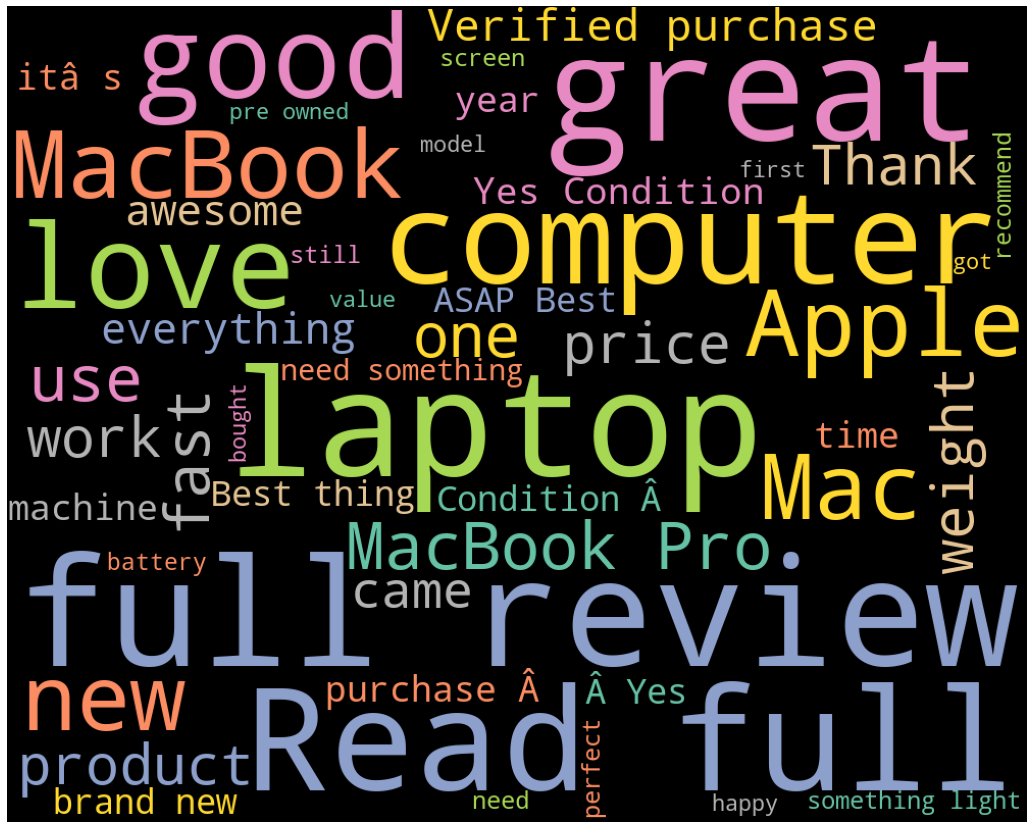

In [71]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 1000, height = 800, background_color='black', max_words=50,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

In [72]:
wordcloud

In [73]:
# Save image
#wordcloud.to_file("wordcloud.png")